TPP08
PENGYU LIU
SID:500679649

We import some package to use

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

read the data 

In [48]:
df = pd.read_csv('Participant-01.csv')
df.head()

,Start,Finish,Steps (count)
0,31-Dec-2021 23:00,01-Jan-2022 00:00,0.0
1,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
2,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
3,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
4,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0


change the start and finish form to be a date type

In [49]:
df["Start"] = df["Start"].apply(pd.to_datetime)
df["Finish"] = df["Finish"].apply(pd.to_datetime)

In [50]:
df

,Start,Finish,Steps (count)
0,2021-12-31 23:00:00,2022-01-01 00:00:00,0.000000
1,2022-01-01 00:00:00,2022-01-01 01:00:00,0.000000
2,2022-01-01 01:00:00,2022-01-01 02:00:00,0.000000
3,2022-01-01 02:00:00,2022-01-01 03:00:00,0.000000
4,2022-01-01 03:00:00,2022-01-01 04:00:00,0.000000
...,...,...,...
5862,2022-09-02 04:00:00,2022-09-02 05:00:00,9.000000
5863,2022-09-02 05:00:00,2022-09-02 06:00:00,0.000000
5864,2022-09-02 06:00:00,2022-09-02 07:00:00,410.584935
5865,2022-09-02 07:00:00,2022-09-02 08:00:00,1153.415065


we let all the step to be integer

In [51]:
df.iloc[:,2] = df.iloc[:,2].astype(int)

In [52]:
df

,Start,Finish,Steps (count)
0,2021-12-31 23:00:00,2022-01-01 00:00:00,0
1,2022-01-01 00:00:00,2022-01-01 01:00:00,0
2,2022-01-01 01:00:00,2022-01-01 02:00:00,0
3,2022-01-01 02:00:00,2022-01-01 03:00:00,0
4,2022-01-01 03:00:00,2022-01-01 04:00:00,0
...,...,...,...
5862,2022-09-02 04:00:00,2022-09-02 05:00:00,9
5863,2022-09-02 05:00:00,2022-09-02 06:00:00,0
5864,2022-09-02 06:00:00,2022-09-02 07:00:00,410
5865,2022-09-02 07:00:00,2022-09-02 08:00:00,1153


We merge the steps by a week 

In [53]:
weaksum = pd.DataFrame(df.resample('W', on='Start')['Steps (count)'].sum()).reset_index()

In [54]:
weaksum.to_csv("final.csv",index = False,sep = ',')

We got the sum of steps for each weeks

Make a box to show

In [66]:
plot = px.box(weaksum, x="Steps (count)")
plot.show()

we can see the each weeks of the steps and can find a different between the each weeks

In [10]:
fig = px.histogram(weaksum, x="Start", y = "Steps (count)", nbins = len(weaksum), title = "Sum of steps for weeks")
fig.update_layout(
    xaxis_title = "Weeks",
    yaxis_title = "Step counts")
fig.show()

we can see fewer steps per week between March and June than other months,and the lowest steps in the first week of January

I wanted to find out how the step counts for each week trended in different months, so I made a new table to show

In [11]:
gb_month = weaksum.groupby([weaksum['Start'].dt.isocalendar().week, weaksum['Start'].dt.month]).mean().rename_axis(['week', 'month']).reset_index()

In [12]:
gb_month.head()

,week,month,Steps (count)
0,1,1,74612
1,2,1,77170
2,3,1,76815
3,4,1,67913
4,5,2,58371


With data from different months I wanted to explore if the seasons affect the number of steps, so I copied the previous dataset

In [13]:
season = gb_month.copy()

In [14]:
season['month'] = season['month'].replace([9,10,11], 'Spring')
season['month'] = season['month'].replace([12,1,2], 'Summer')
season['month'] = season['month'].replace([3,4,5], 'Fall')
season['month'] = season['month'].replace([6,7,8], 'Winter')

In [15]:
season.head()

,week,month,Steps (count)
0,1,Summer,74612
1,2,Summer,77170
2,3,Summer,76815
3,4,Summer,67913
4,5,Summer,58371


Now we have successfully transformed every three months into a seasonal format

Change the schema name

In [16]:
season.rename({"Steps (count)":"sum of steps"}, axis = 1, inplace = True)
season.rename({"month":"season"}, axis = 1, inplace = True)

In [17]:
season.head()

,week,season,sum of steps
0,1,Summer,74612
1,2,Summer,77170
2,3,Summer,76815
3,4,Summer,67913
4,5,Summer,58371


In [18]:
gb_season = season.groupby(['season','week']).mean() #We have grouped the averages of different seasons and weeks

In [19]:
gb_season.head()

sum of steps
season week              
Fall   9            40054
       10           49387
       11           69494
       12           59317
       13           54628

In [20]:
#Let the data of the corresponding season be stored in the corresponding variable name
spring = gb_season.iloc[gb_season.index.get_level_values('season') == 'Spring'].reset_index() 
summer = gb_season.iloc[gb_season.index.get_level_values('season') == 'Summer'].reset_index()
fall = gb_season.iloc[gb_season.index.get_level_values('season') == 'Fall'].reset_index()
winter = gb_season.iloc[gb_season.index.get_level_values('season') == 'Winter'].reset_index()


I made a 2x2 graphic table to show the distribution of steps in different weeks of the four seasons

Text(0.5, 0.98, 'Average Steps during the weeks in Seasons')

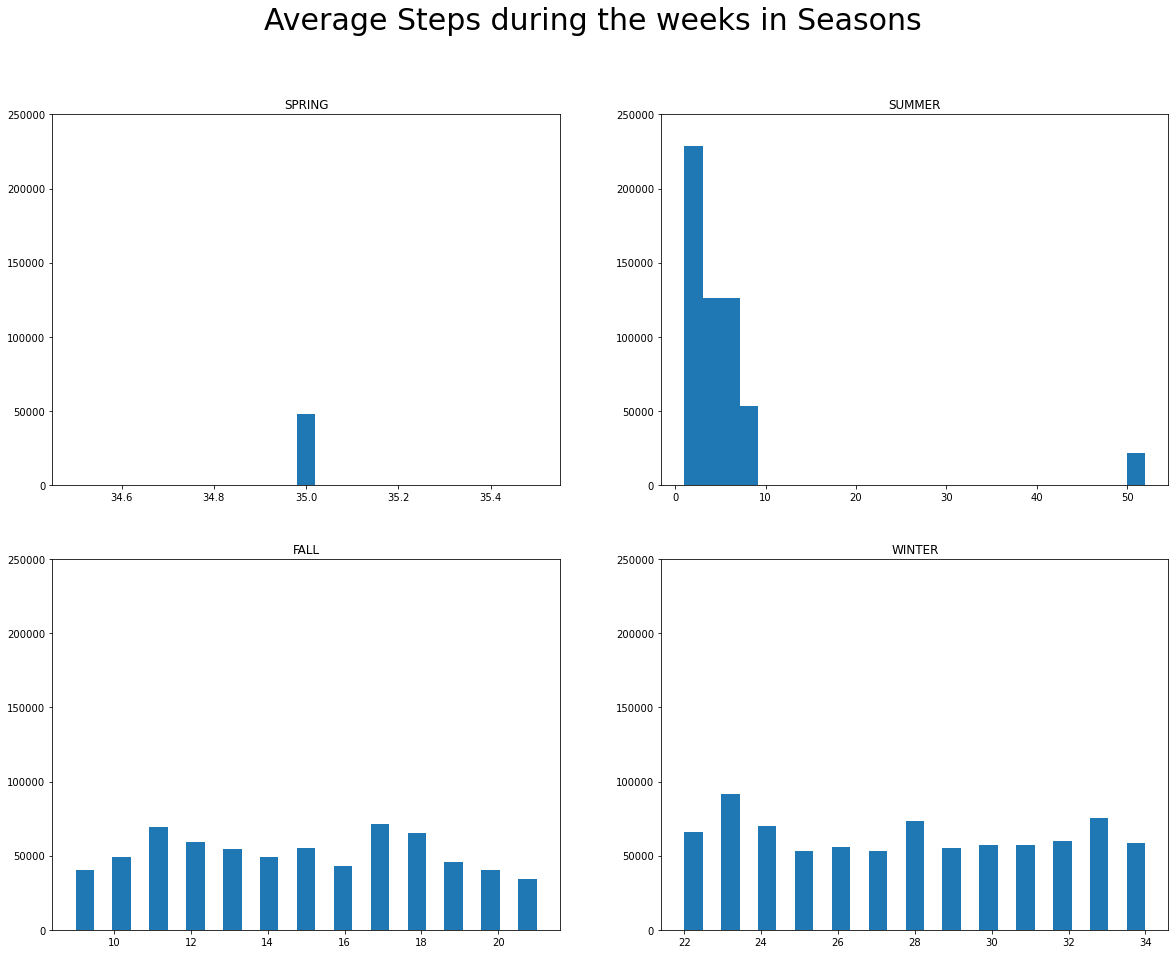

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15)) #set a 2x2 figure table to show the 4 different seasons

plt.subplot(2,2,1) # to be the first 1 (top left)
plt.hist(x = spring['week'], weights = spring['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('SPRING')

plt.subplot(2,2,2) # to be the first 1 (top right)
plt.hist(x = summer['week'], weights = summer['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('SUMMER')

plt.subplot(2,2,3) # to be the first 1 (bottom left)
plt.hist(x = fall['week'], weights = fall['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('FALL')

plt.subplot(2,2,4) # to be the first 1 (bottom right)
plt.hist(x = winter['week'], weights = winter['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('WINTER')

plt.suptitle('Average Steps during the weeks in Seasons', fontsize=30)

From the above figure, we can see that the distribution of steps in spring and summer is relatively uniform and similar, while in autumn and winter, there is a huge gap between the first few weeks of winter and other weeks, and only one week of data in autumn exists. I think This is related to the incompleteness of the data. The step count data after September is missing. We will continue to explore and solve this problem.

Because the data is not complete in one year, the data in Spring and Summer is missing and it is impossible to observe the trend, so I decided to delete the images them to compare the trend of weekly steps in Fall and Winter.

## Analyse the seasons insight in other datasets

### dataset 01-detail

In [22]:
df1_detail = pd.read_csv('Participant-01-detail.csv', header=None)
df1_detail.head()

,0,1,2,3
0,person1,2022-01-01,7,32
1,person1,2022-01-01,7,49
2,person1,2022-01-01,7,14
3,person1,2022-01-01,7,20
4,person1,2022-01-01,7,16


In [23]:
df1_detail.columns = ["Person", "Date", "Hour", "Steps"] #check the data meanings and change the name for it

In [24]:
df1_detail["Date"] = df1_detail["Date"].apply(pd.to_datetime) #change to the date type

In [25]:
weaksum_detail = pd.DataFrame(df1_detail.resample('W', on='Date')['Steps'].sum()).reset_index() #change the date to week type

In [26]:
# check the season range
detail01_Fall = weaksum_detail.loc[(weaksum_detail['Date'] >= '2022-03-01') & (weaksum_detail['Date'] < '2022-06-01')]
detail01_Winter = weaksum_detail[(weaksum_detail['Date'] >= '2022-06-01') & (weaksum_detail['Date'] < '2022-09-01')]

In [27]:
detail01_Fall

,Date,Steps
9,2022-03-06,67415
10,2022-03-13,82315
11,2022-03-20,120349
12,2022-03-27,99082
13,2022-04-03,92623
14,2022-04-10,85668
15,2022-04-17,92950
16,2022-04-24,69616
17,2022-05-01,117220
18,2022-05-08,110720


In [ ]:
detail01_Fall['Date'].replace('-','',regex=True,inplace=True)
detail01_Fall['Date'] = pd.to_datetime(detail01_Fall['Date'], format='%Y%m%d')
detail01_Fall['Week'] = detail01_Fall['Date'].dt.isocalendar().week


detail01_Winter['Date'].replace('-','',regex=True,inplace=True)
detail01_Winter['Date'] = pd.to_datetime(detail01_Winter['Date'], format='%Y%m%d')
detail01_Winter['Week'] = detail01_Winter['Date'].dt.isocalendar().week

In [29]:
detail01_Fall

,Date,Steps,Week
9,2022-03-06,67415,9
10,2022-03-13,82315,10
11,2022-03-20,120349,11
12,2022-03-27,99082,12
13,2022-04-03,92623,13
14,2022-04-10,85668,14
15,2022-04-17,92950,15
16,2022-04-24,69616,16
17,2022-05-01,117220,17
18,2022-05-08,110720,18


### dataset 02-detail

In [30]:
df2_detail = pd.read_csv('Participant-02-detail.csv')
df2_detail.head()

,Source,Date,Hour,Count
0,P2 Phone,2022-01-01,5,31
1,P2’s Apple Watch,2021-12-31,21,20
2,P2’s Apple Watch,2021-12-31,21,16
3,P2’s Apple Watch,2022-01-01,5,29
4,P2’s Apple Watch,2022-01-01,5,13


In [31]:
df2_detail["Date"] = df2_detail["Date"].apply(pd.to_datetime) #change to date type

In [32]:
df2_detail= df2_detail.rename(columns={'Count': 'Steps'}) #rename

In [33]:
weaksum02_detail = pd.DataFrame(df2_detail.resample('W', on='Date')['Steps'].sum()).reset_index() #change the date to week type

In [34]:
weaksum02_detail.tail()

,Date,Steps
43,2022-08-07,88347
44,2022-08-14,103128
45,2022-08-21,92510
46,2022-08-28,116310
47,2022-09-04,63897


In [ ]:
#check the range again
detail02_Fall = weaksum_detail.loc[(weaksum02_detail['Date'] >= '2022-03-01') & (weaksum02_detail['Date'] < '2022-06-01')]
detail02_Winter = weaksum_detail[(weaksum02_detail['Date'] >= '2022-06-01') & (weaksum02_detail['Date'] < '2022-09-01')]

In [36]:
detail02_Winter

,Date,Steps
34,2022-08-28,94853
35,2022-09-04,114732
36,2022-09-11,122983
37,2022-09-18,96209
38,2022-09-25,88425


In [ ]:
detail02_Fall['Date'].replace('-','',regex=True,inplace=True)
detail02_Fall['Date'] = pd.to_datetime(detail02_Fall['Date'], format='%Y%m%d')
detail02_Fall['Week'] = detail02_Fall['Date'].dt.isocalendar().week


detail02_Winter['Date'].replace('-','',regex=True,inplace=True)
detail02_Winter['Date'] = pd.to_datetime(detail02_Winter['Date'], format='%Y%m%d')
detail02_Winter['Week'] = detail02_Winter['Date'].dt.isocalendar().week


In [38]:
detail02_Fall


,Date,Steps,Week
21,2022-05-29,53941,21
22,2022-06-05,115544,22
23,2022-06-12,149851,23
24,2022-06-19,116797,24
25,2022-06-26,92001,25
26,2022-07-03,98782,26
27,2022-07-10,84381,27
28,2022-07-17,122183,28
29,2022-07-24,89450,29
30,2022-07-31,83902,30


In [39]:
detail02_Winter

,Date,Steps,Week
34,2022-08-28,94853,34
35,2022-09-04,114732,35
36,2022-09-11,122983,36
37,2022-09-18,96209,37
38,2022-09-25,88425,38


Text(0.5, 0.98, 'Average Steps during the week  by Season')

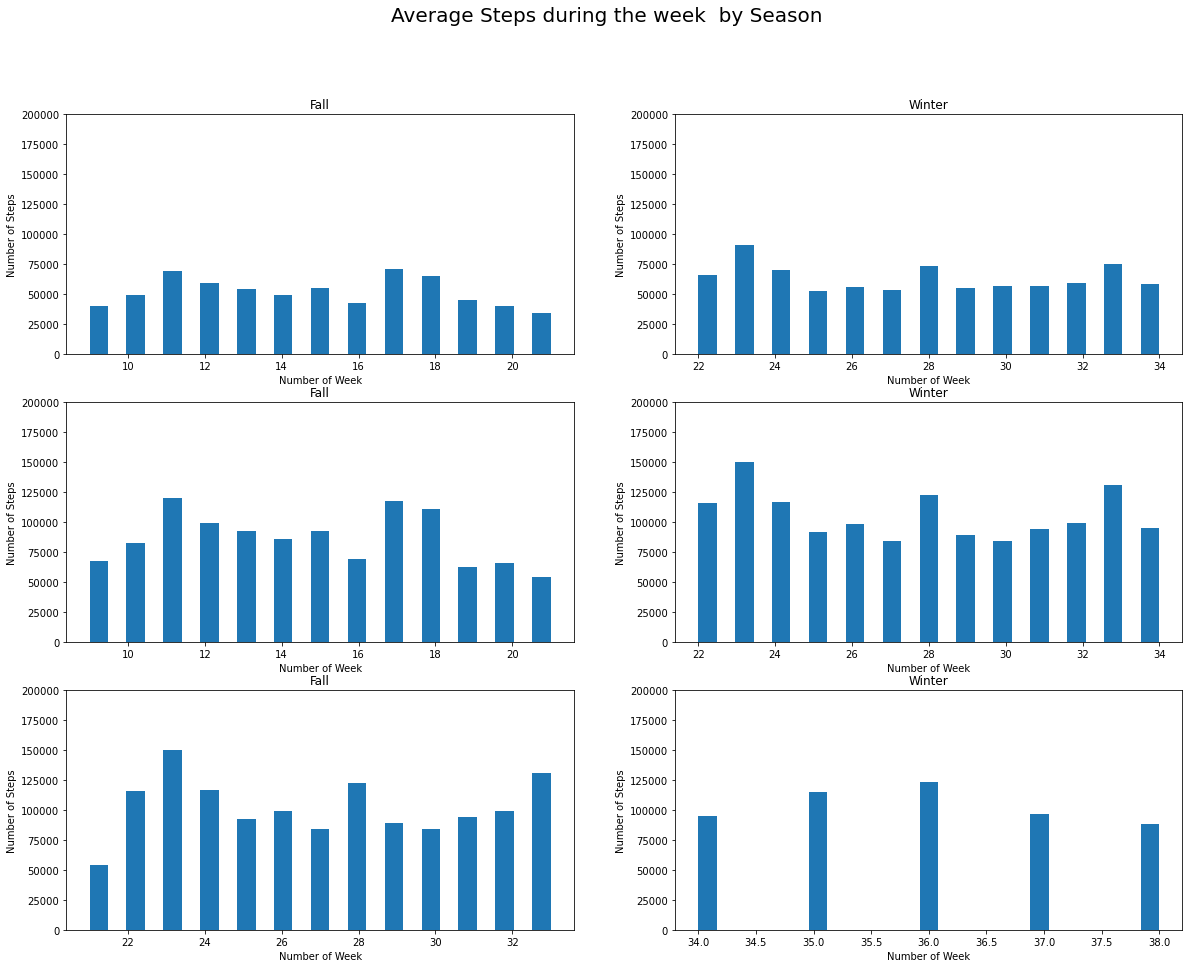

In [45]:
#get a 2x3 graph table
fig, ax = plt.subplots(3, 2, figsize=(20, 15))



plt.subplot(3,2,1) 
plt.hist(x = fall['week'], weights = fall['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 200000])
plt.title('Fall')
plt.xlabel('Number of Week')
plt.ylabel('Number of Steps')

plt.subplot(3,2,2)
plt.hist(x = winter['week'], weights = winter['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 200000])
plt.title('Winter')
plt.xlabel('Number of Week')
plt.ylabel('Number of Steps')


plt.subplot(3,2,3) 
plt.hist(x = detail01_Fall['Week'], weights = detail01_Fall['Steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 200000])
plt.title('Fall')
plt.xlabel('Number of Week')
plt.ylabel('Number of Steps')

plt.subplot(3,2,4)
plt.hist(x = detail01_Winter['Week'], weights = detail01_Winter['Steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 200000])
plt.title('Winter')
plt.xlabel('Number of Week')
plt.ylabel('Number of Steps')


plt.subplot(3,2,5)
plt.hist(x = detail02_Fall['Week'], weights = detail02_Fall['Steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 200000])
plt.title('Fall')
plt.xlabel('Number of Week')
plt.ylabel('Number of Steps')

plt.subplot(3,2,6) 
plt.hist(x = detail02_Winter['Week'], weights = detail02_Winter['Steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 200000])
plt.title('Winter')
plt.xlabel('Number of Week')
plt.ylabel('Number of Steps')

plt.suptitle('Average Steps during the week  by Season', fontsize=20)

We used three different sets of data to observe the seasonal impact of weekly step trends. We found that the number of steps in Winter was higher than that in Fall in the first two sets of data. In the last set of graphs, we found that the summer data is missing a lot and has no reference value. From the first two sets of graphs, we can know that people are more willing to go out and move around because of the increase in summer temperature. We will use other Data is used to testify to this.